<p style=" background-color:#4682b4;font-family:newtimeroman;font-size:200%;color:#fff5ee;text-align:center;border-radius:20px 20px;"><span  style = "padding : 50px; display : block; "><b>EDA Project - AUTO SALES</b></span></p>

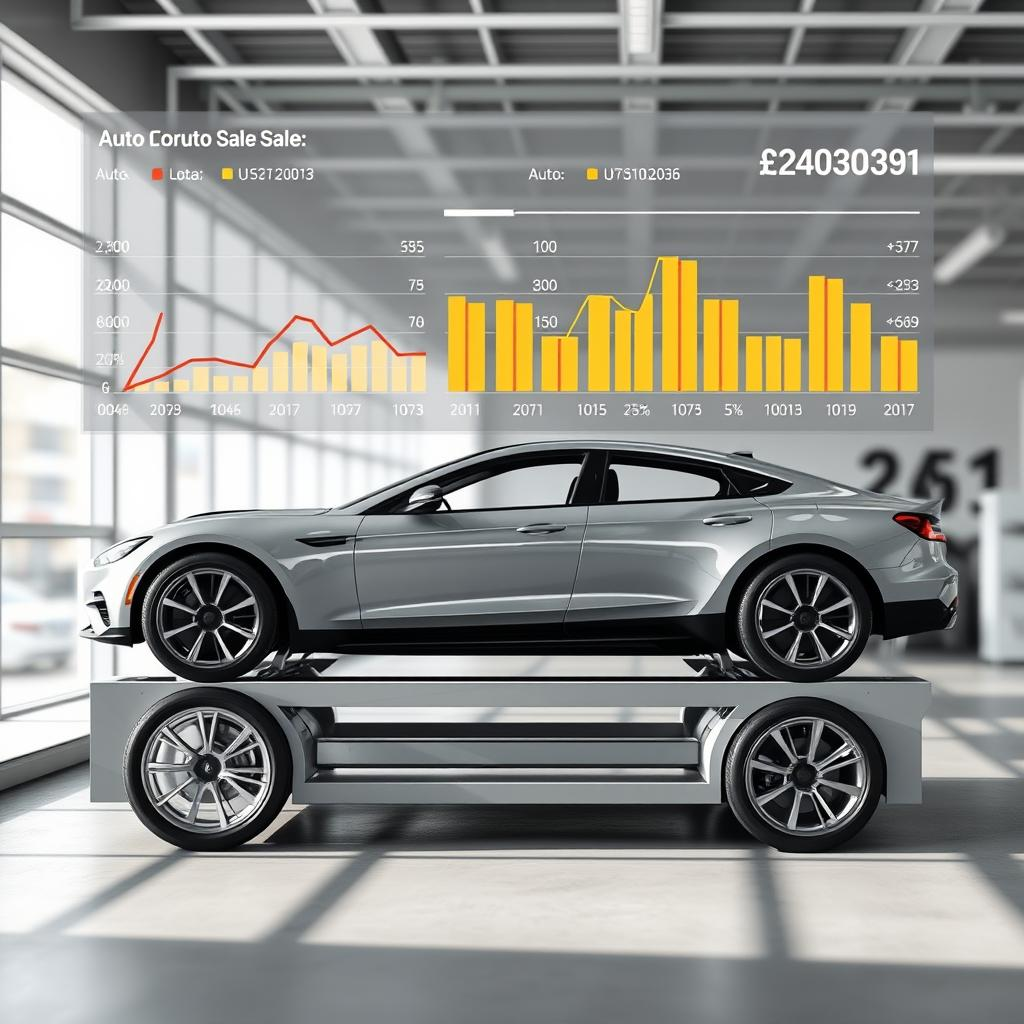

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Data Set</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#organizing-columns">Organizing Columns</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
</ul>

<ul>
  <li><strong>ORDERNUMBER</strong>: A unique number for each order.</li>
  <li><strong>QUANTITYORDERED</strong>: The quantity of products ordered.</li>
  <li><strong>PRICEEACH</strong>: The price of each product.</li>
  <li><strong>ORDERLINENUMBER</strong>: The line number within the order (used to order products in a single order).</li>
  <li><strong>SALES</strong>: The total sales price (price * quantity).</li>
  <li><strong>ORDERDATE</strong>: The date when the order was placed (may need format correction).</li>
  <li><strong>DAYS_SINCE_LASTORDER</strong>: Number of days since the last order.</li>
  <li><strong>STATUS</strong>: The status of the order (e.g., Shipped, Cancelled).</li>
  <li><strong>PRODUCTLINE</strong>: The category of the product (e.g., Motorcycles, Ships).</li>
  <li><strong>MSRP</strong>: The manufacturer's suggested retail price of the product.</li>
  <li><strong>PRODUCTCODE</strong>: A unique code for the product.</li>
  <li><strong>CUSTOMERNAME</strong>: The name of the customer.</li>
  <li><strong>PHONE</strong>: The customer’s phone number.</li>
  <li><strong>ADDRESSLINE1</strong>: The customer’s address (first line).</li>
  <li><strong>CITY</strong>: The city where the customer is located.</li>
  <li><strong>POSTALCODE</strong>: The postal code of the customer.</li>
  <li><strong>COUNTRY</strong>: The country where the customer is located.</li>
  <li><strong>CONTACTLASTNAME</strong>: The last name of the customer’s contact person.</li>
  <li><strong>CONTACTFIRSTNAME</strong>: The first name of the customer’s contact person.</li>
  <li><strong>DEALSIZE</strong>: The size of the deal (Small, Medium, Large).</li>
</ul>


<a id='import-library'></a>
# <font color='midnightblue'> <b>Importing Libraries</b><font color='black'> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from wordcloud import WordCloud


from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='midnightblue'> <b>Loading The Data Set</b><font color='black'> 

In [2]:
df = pd.read_csv('Auto Sales data.csv')
df0 = df.copy()

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


<a id='understanding-dataset'></a>
# <font color='midnightblue'> <b>Understanding The Dataset</b><font color='black'> 

In [6]:
df.sample(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
1402,10282,29,46.82,11,1357.78,20/08/2019,1688,Shipped,Classic Cars,57,S24_1444,Mini Gifts Distributors Ltd.,4155551450,5677 Strong St.,San Rafael,97562,USA,Nelson,Valarie,Small
430,10148,23,117.48,13,2702.04,11/09/2018,1059,Shipped,Classic Cars,141,S18_1129,"Anna's Decorations, Ltd",02 9936 8555,201 Miller Street,North Sydney,2060,Australia,O'Hara,Anna,Small
2323,10305,42,109.96,3,4618.32,13/10/2019,2555,Shipped,Trucks and Buses,115,S50_1392,Marta's Replicas Co.,6175558555,39323 Spinnaker Dr.,Cambridge,51247,USA,Hernandez,Marta,Medium
1003,10301,23,174.42,9,4011.66,05/10/2018,1608,Shipped,Classic Cars,169,S18_3232,"Norway Gifts By Mail, Co.",+47 2212 1555,"Drammensveien 126 A, PB 744 Sentrum",Oslo,N 0106,Norway,Klaeboe,Jan,Medium
342,10320,38,73.42,4,2789.96,03/11/2019,553,Shipped,Classic Cars,79,S12_3990,"Volvo Model Replicas, Co",0921-12 3555,Berguvsvgen 8,Lule,S-958 22,Sweden,Berglund,Christina,Small
2378,10341,38,123.22,3,4682.36,24/11/2019,2568,Shipped,Motorcycles,81,S50_4713,Salzburg Collectables,6562-9555,Geislweg 14,Salzburg,5020,Austria,Pipps,Georg,Medium
2460,10106,30,105.91,16,3177.30,17/02/2018,3295,Shipped,Ships,90,S700_2047,Rovelli Gifts,035-640555,Via Ludovico il Moro 22,Bergamo,24100,Italy,Rovelli,Giovanni,Medium
1022,10425,28,135.47,8,3793.16,31/05/2020,1023,In Process,Classic Cars,169,S18_3232,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Medium
2064,10252,38,87.31,3,3317.78,26/05/2019,2436,Shipped,Classic Cars,80,S24_4620,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium
1901,10373,23,104.10,10,2394.30,31/01/2020,2023,Shipped,Vintage Cars,83,S24_3816,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Small


In [7]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [8]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2747   │ │ string      │ 13    │                                                          │
│ │ Number of columns │ 20     │ │ int32       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ ORDERNUMBER             │   0 │     0 │  10260 │  91.88 │  10100 │  10180 │ 10260 │ 10330 │ 10420 │ ▇▇▆▇▇▆ │  │
│ │ QUANTITYORDERED         │   0 │     0 │   35.1 │  9.762 │      6 │     27 │    35 │    43 │    97 │  ▁▇▇   │  │
│ │ PRICEEACH               │   0 │     0 │  101.1 │  42.04 │  26.88 │  68.75 │ 95.55 │ 127.1 │ 252.9 │ ▅▇▆▃▁  │  │
│ │ ORDERLINENUMBER         │   0 │     0 │  6.491 │  4.231 │      1 │      3 │     6 │     9 │    18 │ ▇▇▅▃▂▁ │  │
│ │ SALES                   │   0 │     0 │   3553 │   1839 │  482.1 │   2204 │  3185 │  4503 │ 14080 │  ▇▇▃▁  │  │
│ │ DAYS_SINCE_LASTORDER    │   0 │     0 │   1757 │  819.3 │     42 │   1077 │  1761 │  2436 │  3562 │ ▃▇▇▇▇▂ │  │
│ │ MSRP                    │   0 │     0 │  100.7 │  40.11 │     33 │     68 │    99 │   124 │   214 │ ▆▇▇▅▂▁ │  │
│ └─────────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ORDERDATE                        │      0 │         0 │                          1 │                  2747 │  │
│ │ STATUS                           │      0 │         0 │                          1 │                  2832 │  │
│ │ PRODUCTLINE                      │      0 │         0 │                        1.8 │                  4865 │  │
│ │ PRODUCTCODE                      │      0 │         0 │                          1 │                  2747 │  │
│ │ CUSTOMERNAME                     │      0 │         0 │                        3.1 │                  8496 │  │
│ │ PHONE                            │      0 │         0 │                          2 │                  5517 │  │
│ │ ADDRESSLINE1                     │      0 │         0 │                        3.5 │                  9478 │  │
│ │ CITY                             │      0 │         0 │                        1.2 │                  3274 │  │
│ │ POSTALCODE                       │      0 │         0 │                        1.1 │                  3097 │  │
│ │ COUNTRY                          │      0 │         

In [10]:
df.describe(include = 'O').T

,count,unique,top,freq
ORDERDATE,2747,246,14/11/2018,38
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [12]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [16]:
df.nunique()

ORDERNUMBER              298
QUANTITYORDERED           58
PRICEEACH               1843
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                246
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
PHONE                     88
ADDRESSLINE1              89
CITY                      71
POSTALCODE                73
COUNTRY                   19
CONTACTLASTNAME           76
CONTACTFIRSTNAME          72
DEALSIZE                   3
dtype: int64

<a id='organizing-columns'></a>
# <font color='midnightblue'> <b>Organizing Columns</b><font color='black'> 

## Convert column names to lowercase letters

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.columns = ['order_number', 'quantity_ordered', 'price_each', 'orderline_number',
       'total_price', 'order_date', 'days_since_lastorder', 'status', 'productline',
       'msrp', 'product_code', 'customer_name', 'phone', 'address_line1', 'city',
       'postal_code', 'country', 'contact_lastname', 'contact_firstname',
       'deal_size']

In [5]:
df.head()

,order_number,quantity_ordered,price_each,orderline_number,total_price,order_date,days_since_lastorder,status,productline,msrp,product_code,customer_name,phone,address_line1,city,postal_code,country,contact_lastname,contact_firstname,deal_size
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [26]:
df.columns

Index(['order_number', 'quantity_ordered', 'price_each', 'orderline_number',
       'sales', 'order_date', 'days_since_lastorder', 'status', 'productline',
       'msrp', 'product_code', 'customer_name', 'phone', 'address_line1',
       'city', 'postal_code', 'country', 'contact_lastname',
       'contact_firstname', 'deal_size'],
      dtype='object')

## column order_date

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [7]:
df['order_year'] = df['order_date'].dt.year

In [31]:
df.head(1)

,order_number,quantity_ordered,price_each,orderline_number,sales,order_date,days_since_lastorder,status,productline,msrp,product_code,customer_name,phone,address_line1,city,postal_code,country,contact_lastname,contact_firstname,deal_size,order_year
0,10107,30,95.7,2,2871.0,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2018


## column contact_name

In [6]:
df['contact_fullname'] = df['contact_firstname'] + ' ' + df['contact_lastname']

In [8]:
df.drop(columns = ['contact_firstname','contact_lastname'], inplace= True)

In [9]:
df.head()

,order_number,quantity_ordered,price_each,orderline_number,total_price,order_date,days_since_lastorder,status,productline,msrp,product_code,customer_name,phone,address_line1,city,postal_code,country,deal_size,contact_fullname
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small,Kwai Yu
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small,Paul Henriot
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium,Daniel Da Cunha
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium,Julie Young
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Medium,Juri Hirano


<a id='data-visualization'></a>
# <font color='midnightblue'> <b>Data Visualization</b><font color='black'> 

## Display Number of sold product by type

In [44]:
product_count = df.groupby(['productline','order_year']).size().reset_index(name = "count")
product_count

,productline,order_year,count
0,Classic Cars,2018,353
1,Classic Cars,2019,440
2,Classic Cars,2020,156
3,Motorcycles,2018,91
4,Motorcycles,2019,164
5,Motorcycles,2020,58
6,Planes,2018,85
7,Planes,2019,159
8,Planes,2020,60
9,Ships,2018,81


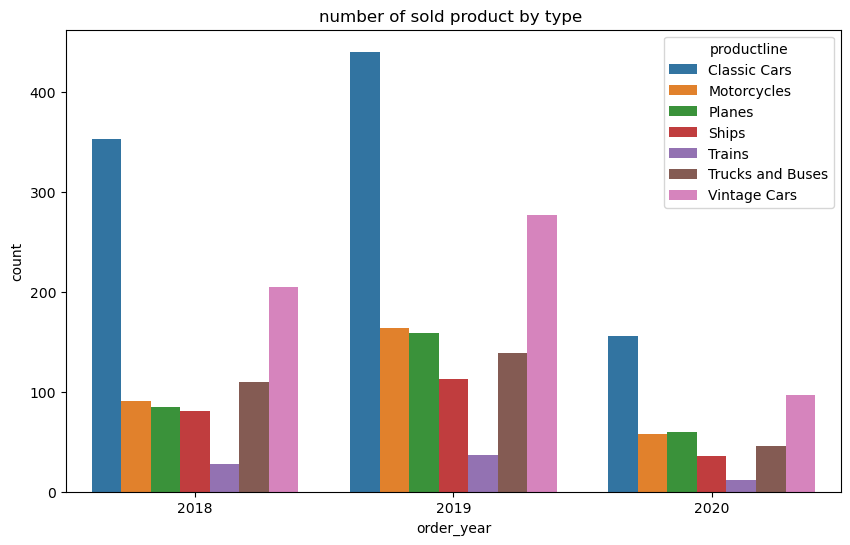

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'order_year' , y='count', hue ='productline', data = product_count)   
plt.title('number of soled product by year')
plt.show()

In [56]:
product_count.pivot(index='order_year', columns='productline', values='count')

productline,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
order_year,,,,,,,
2018,353,91,85,81,28,110,205
2019,440,164,159,113,37,139,277
2020,156,58,60,36,12,46,97


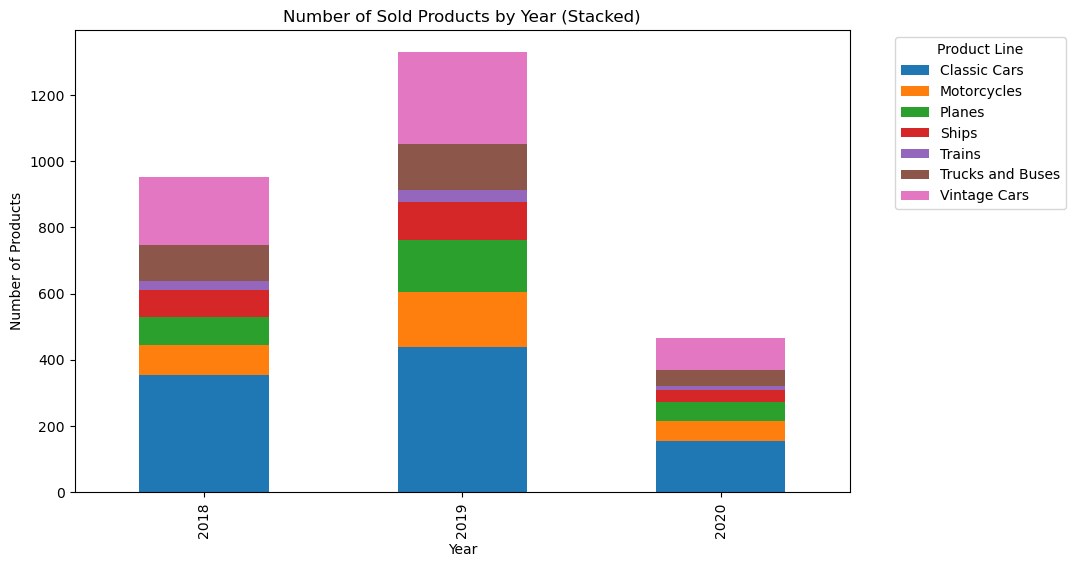

In [55]:
product_pivot = product_count.pivot(index='order_year', columns='productline', values='count')

product_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Sold Products by Year (Stacked)')
plt.ylabel('Number of Products')
plt.xlabel('Year')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Display number of soled product by type

In [70]:
product_count1 = df.groupby(['productline']).size().reset_index(name = "count")
product_count1

,productline,count
0,Classic Cars,949
1,Motorcycles,313
2,Planes,304
3,Ships,230
4,Trains,77
5,Trucks and Buses,295
6,Vintage Cars,579


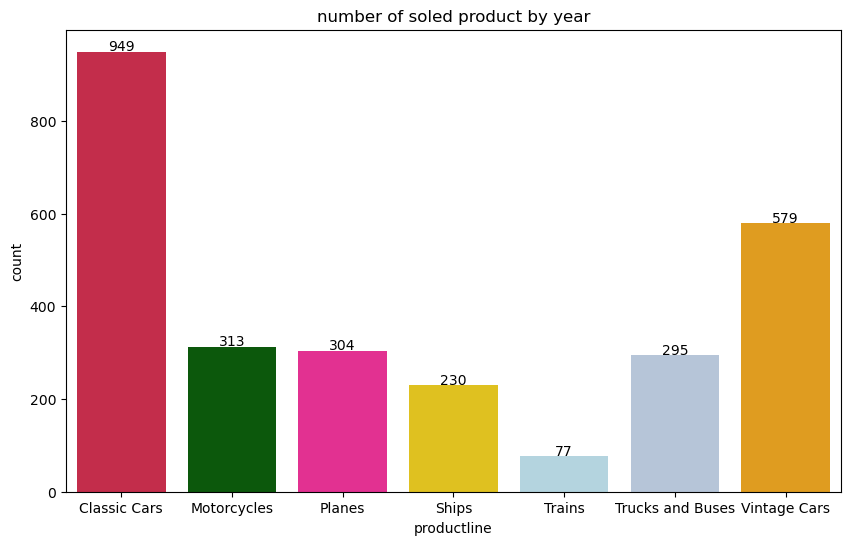

In [75]:
color_list = ['#dc143c','#006400','#ff1493','#ffd700','#add8e6','#b0c4de','#ffa500']

plt.figure(figsize=(10,6))
sns.barplot(x = 'productline' , y='count', data = product_count1, palette = color_list)   

for index, value in enumerate(product_count1['count']):
    plt.text(index, value + 2, str(value), ha='center')
    
plt.title('number of soled product by type')
plt.show()

## Display Number of Sold Products by Year

In [60]:
year_count = df.groupby(['order_year']).size().reset_index(name = "count")
year_count

,order_year,count
0,2018,953
1,2019,1329
2,2020,465


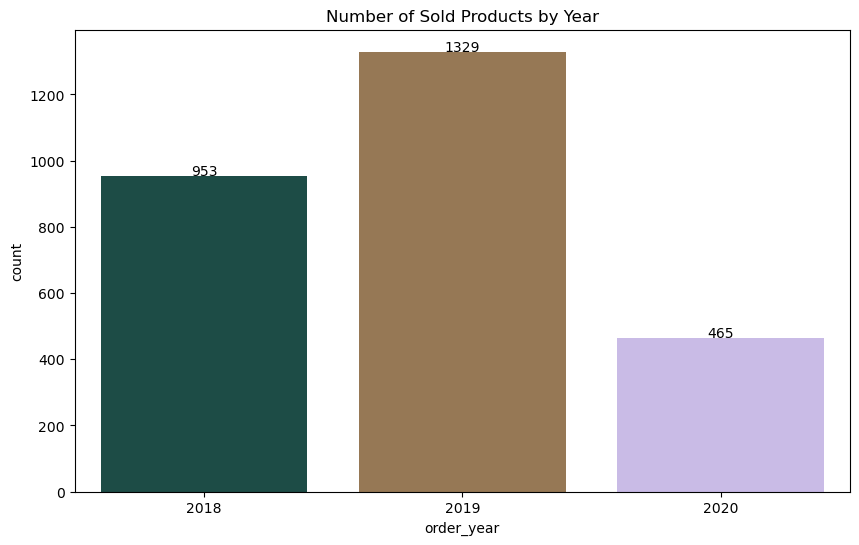

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'order_year' , y ='count', data = year_count, palette="cubehelix")   

for index, value in enumerate(year_count['count']):
    plt.text(index, value + 2, str(value), ha='center')

plt.title('Number of Sold Products by Year')
plt.show()

## Distribution of Sales by Country

In [23]:
country_list = df['country'].value_counts().reset_index(name ='count')
country_list

,country,count
0,USA,928
1,Spain,342
2,France,314
3,Australia,185
4,UK,144
5,Italy,113
6,Finland,92
7,Norway,85
8,Singapore,79
9,Canada,70


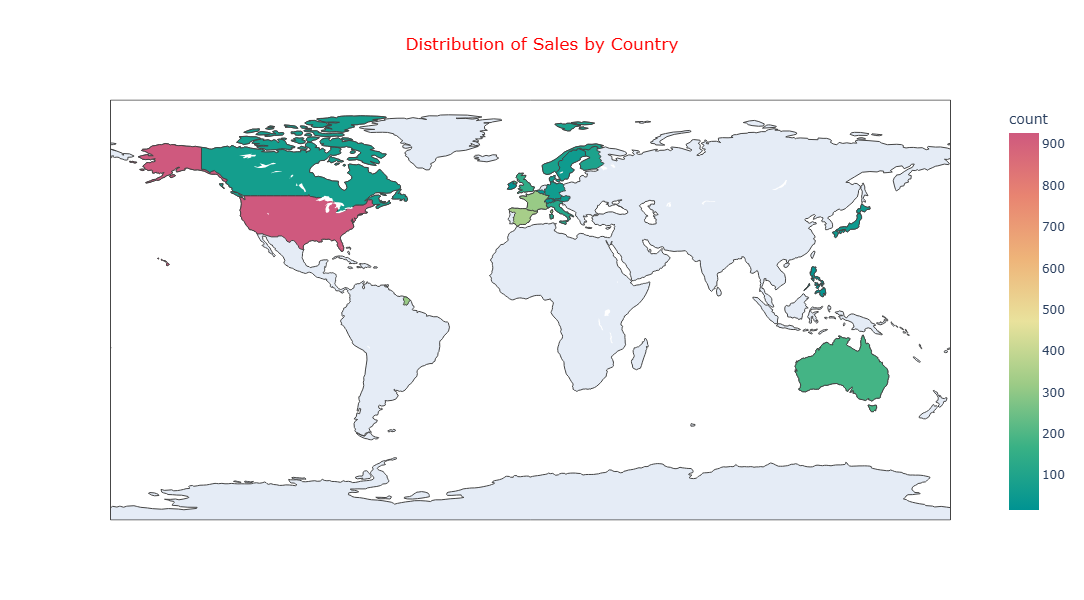

In [25]:

fig = px.choropleth(
    country_list,
    locations='country',
    locationmode='country names',
    color='count',
    hover_name='country',
    color_continuous_scale=px.colors.diverging.Temps,
    title='Distribution of Sales by Country'
)


fig.update_layout(
    title=dict(text='Distribution of Sales by Country', font=dict(color='red')),
    title_x=0.5, 
    width=900,
    height=600
)

fig.show()

## Display Status of orders

In [104]:
fil_status = df.status.value_counts().reset_index()

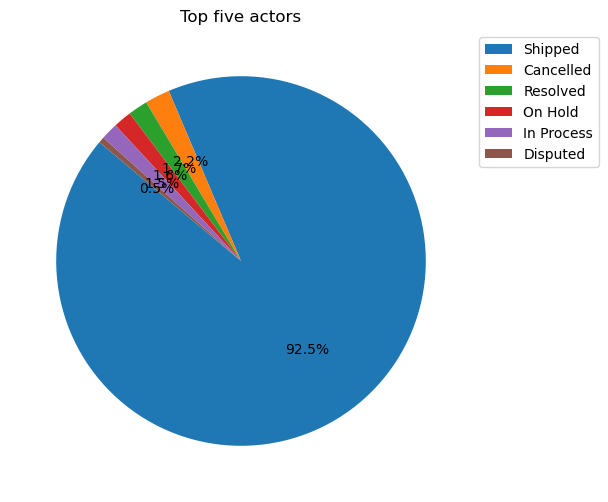

In [117]:
plt.figure(figsize=(6, 6))
plt.pie(fil_status['count'], autopct='%1.1f%%', startangle=140 )
plt.legend(fil_status['status'], loc="best", bbox_to_anchor=(1, 1))
plt.title('Status of orders')
plt.show()

## Display the difference between MSRPs and real prices

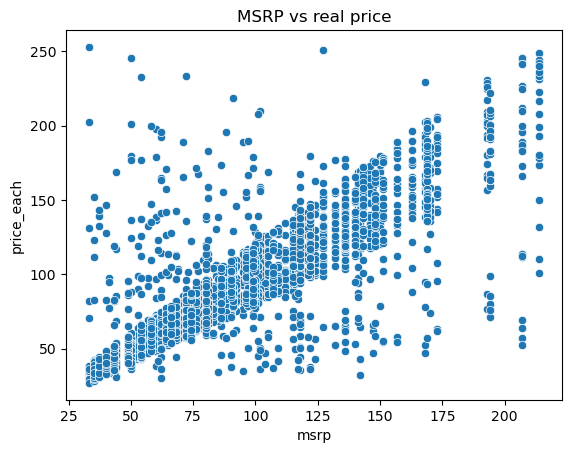

In [21]:
sns.scatterplot(x='msrp', y='price_each', data= df)
plt.title("MSRP vs real price")
plt.show()

## Display Deal Size Distribution

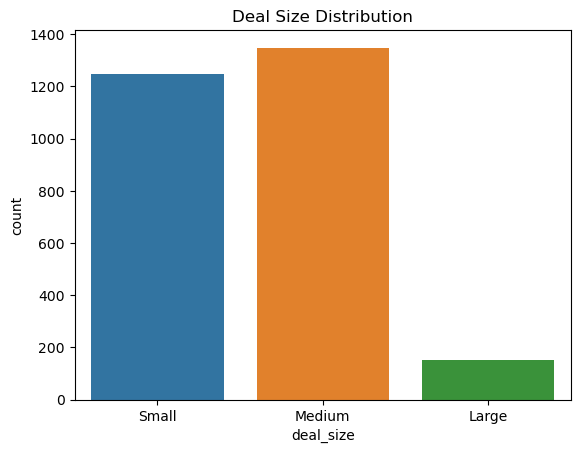

In [14]:
sns.countplot(x='deal_size', data=df, palette = "tab10")
plt.title("Deal Size Distribution")
plt.show()

<p style=" background-color:#4682b4;font-family:newtimeroman;font-size:200%;color:#fff5ee;text-align:center;border-radius:20px 20px;"><span  style = "padding : 30px; display : block; "><b>THANK YOU!</b></span></p>